In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
def process_csv(path):
    data = pd.read_csv(path)
    
    plt.plot(data['time'], data['ax (m/s^2)'])
    plt.plot(data['time'], data['ay (m/s^2)'])
    plt.plot(data['time'], data['az (m/s^2)'])
    plt.plot(data['time'], data['aT (m/s^2)'])
    plt.xlabel('time')
    plt.ylabel('acceleration')
    plt.title('Before Processing')
    plt.show()
    
    max_aT_row = data.loc[data['aT (m/s^2)'].idxmax()]
    max_aT_time = max_aT_row[0]
    
    data = data[data['time'] > (max_aT_time - 0.8)]
    data = data[data['time'] < (max_aT_time + 0.8)]
    
    max_aT = data['aT (m/s^2)'].max()
    max_ax = data['ax (m/s^2)'].max()
    max_ay = data['ay (m/s^2)'].max()
    max_az = data['az (m/s^2)'].max()
    print("max_aT: ", max_aT)
    print("max_ax: ", max_ax)
    print("max_ay: ", max_ay)
    print("max_az: ", max_az)
    
    avg_aT = data['aT (m/s^2)'].mean()
    avg_ax = data['ax (m/s^2)'].mean()
    avg_ay = data['ay (m/s^2)'].mean()
    avg_az = data['az (m/s^2)'].mean()
    print("avg_aT: ", avg_aT)
    print("avg_ax: ", avg_ax)
    print("avg_ay: ", avg_ay)
    print("avg_az: ", avg_az)
    
    plt.plot(data['time'], data['ax (m/s^2)'])
    plt.plot(data['time'], data['ay (m/s^2)'])
    plt.plot(data['time'], data['az (m/s^2)'])
    plt.plot(data['time'], data['aT (m/s^2)'])
    plt.xlabel('time')
    plt.ylabel('acceleration')
    plt.title('After Processing')
    plt.show()

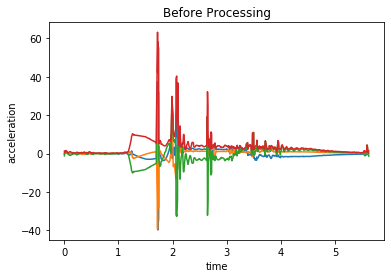

max_aT:  63.129
max_ax:  37.4319
max_ay:  27.9886
max_az:  36.1327
avg_aT:  7.5233880126182955
avg_ax:  0.5245905362776029
avg_ay:  -0.36312681388012596
avg_az:  -2.3766189274447944


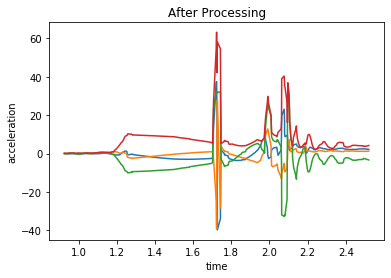

In [3]:
process_csv('drop-as-01.csv')

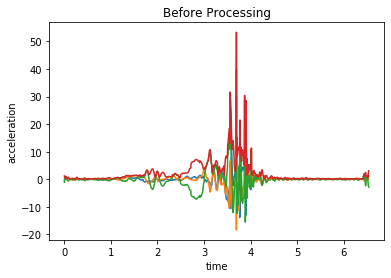

max_aT:  53.299
max_ax:  39.7942
max_ay:  10.4723
max_az:  30.3423
avg_aT:  6.358222222222226
avg_ax:  0.08379904761904781
avg_ay:  -1.1224707936507923
avg_az:  1.4465038095238087


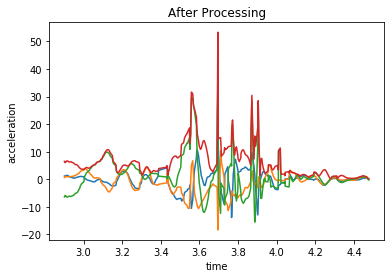

In [4]:
process_csv('fall-as-01.csv')

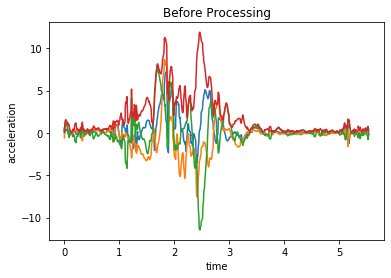

max_aT:  11.899000000000001
max_ax:  7.1853
max_ay:  8.6749
max_az:  7.7514
avg_aT:  4.837176656151421
avg_ax:  1.3017201892744488
avg_ay:  -0.6286186119873819
avg_az:  0.2633492113564665


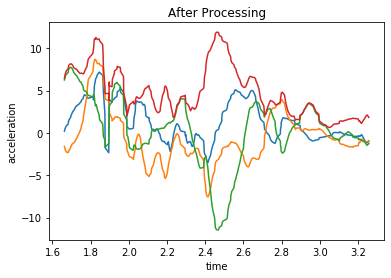

In [5]:
process_csv('lie-as-01.csv')

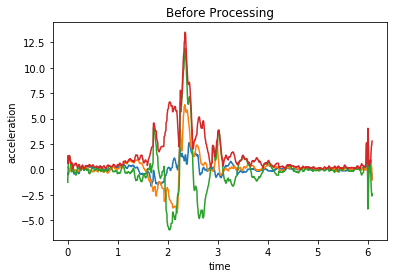

max_aT:  13.505
max_ax:  2.6383
max_ay:  6.3741
max_az:  11.9272
avg_aT:  4.051223974763409
avg_ax:  0.12658864353312313
avg_ay:  0.025131230283911832
avg_az:  0.21388075709779195


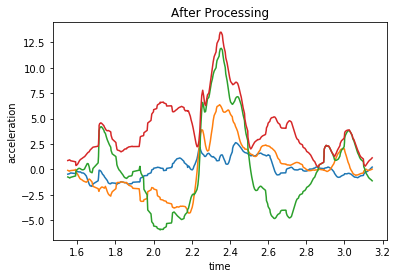

In [6]:
process_csv('sit-as-01.csv')

In [7]:
def process_csv(path):
    data = pd.read_csv(path)
    
    max_aT_row = data.loc[data['aT (m/s^2)'].idxmax()]
    max_aT_time = max_aT_row[0]
    
    data = data[data['time'] > (max_aT_time - 0.9)]
    data = data[data['time'] < (max_aT_time + 0.9)]
    
    max_aT = data['aT (m/s^2)'].max()
    max_ax = data['ax (m/s^2)'].max()
    max_ay = data['ay (m/s^2)'].max()
    max_az = data['az (m/s^2)'].max()
    
    avg_aT = data['aT (m/s^2)'].mean()
    avg_ax = data['ax (m/s^2)'].mean()
    avg_ay = data['ay (m/s^2)'].mean()
    avg_az = data['az (m/s^2)'].mean()
    
    row = [{'max_ax':max_ax, 'max_ay':max_ay, 'max_az':max_az, 'max_aT':max_aT, 'avg_ax':avg_ax, 'avg_ay':avg_ay, 'avg_az':avg_az, 'avg_aT':avg_aT}]
    
    df = pd.DataFrame(row)
    return df

In [8]:
member = ['as', 'sd']

In [9]:
number = ['02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12','13','14','15','16','17','18','19']

In [10]:
drop_data = process_csv('drop-as-01.csv')
new_data = process_csv('drop-sd-01.csv')
drop_data = pd.concat([drop_data, new_data])
for num in number:
    for mem in member:
        string = 'drop-' + mem + '-' + num + '.csv'
        new_data = process_csv(string)
        drop_data = pd.concat([drop_data, new_data])

In [11]:
count_drop_data = len(drop_data)

In [12]:
drop_data.index = range(count_drop_data)

In [13]:
fall_data = process_csv('fall-as-01.csv')
new_data = process_csv('fall-sd-01.csv')
fall_data = pd.concat([fall_data, new_data])
for num in number:
    for mem in member:
        string = 'fall-' + mem + '-' + num + '.csv'
        new_data = process_csv(string)
        fall_data = pd.concat([fall_data, new_data])

In [14]:
count_fall_data = len(fall_data)

In [15]:
fall_data.index = range(count_fall_data)

In [16]:
lie_data = process_csv('lie-as-01.csv')
new_data = process_csv('lie-sd-01.csv')
lie_data = pd.concat([lie_data, new_data])
for num in number:
    for mem in member:
        string = 'lie-' + mem + '-' + num + '.csv'
        new_data = process_csv(string)
        lie_data = pd.concat([lie_data, new_data])

In [17]:
count_lie_data = len(lie_data)

In [18]:
lie_data.index = range(count_lie_data)

In [19]:
sit_data = process_csv('sit-as-01.csv')
new_data = process_csv('sit-sd-01.csv')
sit_data = pd.concat([sit_data, new_data])
for num in number:
    for mem in member:
        string = 'sit-' + mem + '-' + num + '.csv'
        new_data = process_csv(string)
        sit_data = pd.concat([sit_data, new_data])

In [20]:
count_sit_data = len(sit_data)

In [21]:
sit_data.index = range(count_sit_data)

In [22]:
#drop_data

In [23]:
#fall_data

In [24]:
#sit_data

In [25]:
#lie_data

In [26]:
drop_data = drop_data.rename(columns={'avg_aT':'drop_avg_aT', 'avg_ax':'drop_avg_ax', 'avg_ay':'drop_avg_ay', 'avg_az':'drop_avg_az', 'max_aT':'drop_max_aT', 'max_ax':'drop_max_ax', 'max_ay':'drop_max_ay', 'max_az':'drop_max_az'})

In [27]:
fall_data = fall_data.rename(columns={'avg_aT':'fall_avg_aT', 'avg_ax':'fall_avg_ax', 'avg_ay':'fall_avg_ay', 'avg_az':'fall_avg_az', 'max_aT':'fall_max_aT', 'max_ax':'fall_max_ax', 'max_ay':'fall_max_ay', 'max_az':'fall_max_az'})

In [28]:
sit_data = sit_data.rename(columns={'avg_aT':'sit_avg_aT', 'avg_ax':'sit_avg_ax', 'avg_ay':'sit_avg_ay', 'avg_az':'sit_avg_az', 'max_aT':'sit_max_aT', 'max_ax':'sit_max_ax', 'max_ay':'sit_max_ay', 'max_az':'sit_max_az'})

In [29]:
lie_data = lie_data.rename(columns={'avg_aT':'lie_avg_aT', 'avg_ax':'lie_avg_ax', 'avg_ay':'lie_avg_ay', 'avg_az':'lie_avg_az', 'max_aT':'lie_max_aT', 'max_ax':'lie_max_ax', 'max_ay':'lie_max_ay', 'max_az':'lie_max_az'})

In [30]:
merge_data = pd.concat([drop_data, fall_data, sit_data, lie_data], axis = 1)

In [31]:
merge_data

,drop_avg_aT,drop_avg_ax,drop_avg_ay,drop_avg_az,drop_max_aT,drop_max_ax,drop_max_ay,drop_max_az,fall_avg_aT,fall_avg_ax,...,sit_max_ay,sit_max_az,lie_avg_aT,lie_avg_ax,lie_avg_ay,lie_avg_az,lie_max_aT,lie_max_ax,lie_max_ay,lie_max_az
0,6.907709,0.590119,-0.249698,-2.277423,63.129,37.4319,27.9886,36.1327,6.065724,0.117631,...,6.3741,11.9272,4.488359,1.137037,-0.613888,0.274124,11.899,7.1853,8.6749,7.7514
1,4.926577,-0.226511,-0.493233,-1.407860,99.000,2.3580,4.9485,69.8551,8.535080,0.352341,...,2.2105,6.1944,3.750373,-0.297921,-0.822996,0.170451,22.817,4.5511,7.7372,18.8755
2,7.187806,0.294699,-0.176636,-2.584406,63.075,38.0318,30.8290,42.8899,7.149871,0.146284,...,12.0414,15.6129,6.835500,0.844022,-2.085038,0.396818,35.051,8.1326,28.1737,29.2113
3,5.782752,2.118436,-0.276231,-1.281230,83.038,14.8911,22.3661,70.5432,6.037507,-0.225608,...,2.5295,4.2227,3.570813,0.009076,-0.519266,0.348165,10.946,3.7559,5.5424,9.6884
4,7.296351,0.753099,-0.357073,-0.168676,58.379,36.8481,32.9408,32.6144,7.581761,0.571719,...,12.2390,16.1894,5.936826,0.398485,-2.049515,0.145212,23.179,7.0867,21.9710,11.3362
5,5.784048,-0.212978,-0.846836,-1.712998,125.036,2.9754,13.4190,70.3945,9.136852,0.888416,...,4.4541,5.4530,3.620476,-0.087793,-0.375142,0.384255,13.683,5.9466,5.2294,11.7778
6,7.441070,-0.214364,-0.637626,-1.322034,57.429,23.8014,28.6599,33.4148,7.322473,0.528290,...,14.5740,16.4407,6.055119,0.630888,-1.637257,0.434616,28.734,5.7312,25.7773,16.7151
7,5.430591,-0.337776,-0.764373,-1.838404,80.308,20.7848,3.3062,69.8851,5.344204,-0.074248,...,4.2232,5.2286,4.232335,-0.032357,-0.515306,0.317235,12.810,7.3787,6.7008,7.9214
8,7.284762,0.462468,-0.960100,-1.848518,56.308,37.5414,34.3636,37.4826,10.578660,2.235908,...,22.0577,29.7131,5.504583,0.827306,-1.704841,0.091319,19.217,9.2956,14.5671,14.7749
9,5.328027,-0.449883,-0.481594,-1.647499,96.681,7.3748,66.6880,69.9562,4.965831,-0.288749,...,3.3597,5.8357,4.101527,0.232607,-0.639794,0.246915,18.140,3.6859,3.7791,16.4218


In [32]:
stat_avg_aT = merge_data[['drop_avg_aT', 'fall_avg_aT', 'sit_avg_aT', 'lie_avg_aT']].copy()

In [33]:
melt_stat_avg_aT = pd.melt(stat_avg_aT)

In [34]:
posthoc_avg_aT = pairwise_tukeyhsd(
    melt_stat_avg_aT['value'].astype('float64'), melt_stat_avg_aT['variable'],
    alpha=0.05)

In [35]:
print(posthoc_avg_aT)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
drop_avg_aT fall_avg_aT   0.4701 0.4491 -0.3513  1.2914  False
drop_avg_aT  lie_avg_aT  -1.3672  0.001 -2.1886 -0.5459   True
drop_avg_aT  sit_avg_aT   -2.864  0.001 -3.6853 -2.0426   True
fall_avg_aT  lie_avg_aT  -1.8373  0.001 -2.6587 -1.0159   True
fall_avg_aT  sit_avg_aT  -3.3341  0.001 -4.1554 -2.5127   True
 lie_avg_aT  sit_avg_aT  -1.4968  0.001 -2.3181 -0.6754   True
--------------------------------------------------------------


In [36]:
stat_avg_ax = merge_data[['drop_avg_ax', 'fall_avg_ax', 'sit_avg_ax', 'lie_avg_ax']].copy()
melt_stat_avg_ax = pd.melt(stat_avg_ax)
posthoc_avg_ax = pairwise_tukeyhsd(
    melt_stat_avg_ax['value'].astype('float64'), melt_stat_avg_ax['variable'],
    alpha=0.05)
print(posthoc_avg_ax)


     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
drop_avg_ax fall_avg_ax  -0.0655    0.9 -0.3603  0.2294  False
drop_avg_ax  lie_avg_ax   0.0271    0.9 -0.2678  0.3219  False
drop_avg_ax  sit_avg_ax  -0.3997 0.0032 -0.6945 -0.1048   True
fall_avg_ax  lie_avg_ax   0.0925 0.8278 -0.2023  0.3874  False
fall_avg_ax  sit_avg_ax  -0.3342 0.0194 -0.6291 -0.0394   True
 lie_avg_ax  sit_avg_ax  -0.4268 0.0014 -0.7216 -0.1319   True
--------------------------------------------------------------


In [37]:
stat_avg_ay = merge_data[['drop_avg_ay', 'fall_avg_ay', 'sit_avg_ay', 'lie_avg_ay']].copy()
melt_stat_avg_ay = pd.melt(stat_avg_ay)
posthoc_avg_ay = pairwise_tukeyhsd(
    melt_stat_avg_ay['value'].astype('float64'), melt_stat_avg_ay['variable'],
    alpha=0.05)
print(posthoc_avg_ay)


     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
drop_avg_ay fall_avg_ay  -0.4789  0.001 -0.7577 -0.2001   True
drop_avg_ay  lie_avg_ay  -0.8619  0.001 -1.1406 -0.5831   True
drop_avg_ay  sit_avg_ay   0.4599  0.001  0.1811  0.7387   True
fall_avg_ay  lie_avg_ay  -0.3829 0.0027 -0.6617 -0.1042   True
fall_avg_ay  sit_avg_ay   0.9388  0.001    0.66  1.2176   True
 lie_avg_ay  sit_avg_ay   1.3217  0.001   1.043  1.6005   True
--------------------------------------------------------------


In [38]:
stat_avg_az = merge_data[['drop_avg_az', 'fall_avg_az', 'sit_avg_az', 'lie_avg_az']].copy()
melt_stat_avg_az = pd.melt(stat_avg_az)
posthoc_avg_az = pairwise_tukeyhsd(
    melt_stat_avg_az['value'].astype('float64'), melt_stat_avg_az['variable'],
    alpha=0.05)
print(posthoc_avg_az)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1      group2   meandiff p-adj  lower  upper  reject
------------------------------------------------------------
drop_avg_az fall_avg_az   1.2883 0.001  1.0161 1.5605   True
drop_avg_az  lie_avg_az   1.6948 0.001  1.4226  1.967   True
drop_avg_az  sit_avg_az   1.7281 0.001  1.4559 2.0003   True
fall_avg_az  lie_avg_az   0.4065 0.001  0.1343 0.6787   True
fall_avg_az  sit_avg_az   0.4398 0.001  0.1676 0.7121   True
 lie_avg_az  sit_avg_az   0.0333   0.9 -0.2389 0.3056  False
------------------------------------------------------------


In [39]:
stat_max_aT = merge_data[['drop_max_aT', 'fall_max_aT', 'sit_max_aT', 'lie_max_aT']].copy()
melt_stat_max_aT = pd.melt(stat_max_aT)
posthoc_max_aT = pairwise_tukeyhsd(
    melt_stat_max_aT['value'].astype('float64'), melt_stat_max_aT['variable'],
    alpha=0.05)
print(posthoc_max_aT)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1      group2   meandiff p-adj   lower    upper   reject
----------------------------------------------------------------
drop_max_aT fall_max_aT -36.4563  0.001 -45.8015  -27.111   True
drop_max_aT  lie_max_aT  -57.527  0.001 -66.8723 -48.1817   True
drop_max_aT  sit_max_aT -62.9083  0.001 -72.2536 -53.5631   True
fall_max_aT  lie_max_aT -21.0708  0.001  -30.416 -11.7255   True
fall_max_aT  sit_max_aT -26.4521  0.001 -35.7974 -17.1068   True
 lie_max_aT  sit_max_aT  -5.3813 0.4437 -14.7266    3.964  False
----------------------------------------------------------------


In [40]:
stat_max_ax = merge_data[['drop_max_ax', 'fall_max_ax', 'sit_max_ax', 'lie_max_ax']].copy()
melt_stat_max_ax = pd.melt(stat_max_ax)
posthoc_max_ax = pairwise_tukeyhsd(
    melt_stat_max_ax['value'].astype('float64'), melt_stat_max_ax['variable'],
    alpha=0.05)
print(posthoc_max_ax)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1      group2   meandiff p-adj   lower    upper   reject
----------------------------------------------------------------
drop_max_ax fall_max_ax -11.3915  0.001 -18.1458  -4.6373   True
drop_max_ax  lie_max_ax -23.6671  0.001 -30.4214 -16.9129   True
drop_max_ax  sit_max_ax -26.7472  0.001 -33.5015  -19.993   True
fall_max_ax  lie_max_ax -12.2756  0.001 -19.0299  -5.5214   True
fall_max_ax  sit_max_ax -15.3557  0.001   -22.11  -8.6015   True
 lie_max_ax  sit_max_ax  -3.0801 0.6212  -9.8343   3.6741  False
----------------------------------------------------------------


In [41]:
stat_max_ay = merge_data[['drop_max_ay', 'fall_max_ay', 'sit_max_ay', 'lie_max_ay']].copy()
melt_stat_max_ay = pd.melt(stat_max_ay)
posthoc_max_ay = pairwise_tukeyhsd(
    melt_stat_max_ay['value'].astype('float64'), melt_stat_max_ay['variable'],
    alpha=0.05)
print(posthoc_max_ay)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1      group2   meandiff p-adj   lower    upper   reject
----------------------------------------------------------------
drop_max_ay fall_max_ay  -8.1527 0.0053 -14.4487  -1.8567   True
drop_max_ay  lie_max_ay -12.9233  0.001 -19.2193  -6.6273   True
drop_max_ay  sit_max_ay -16.5168  0.001 -22.8128 -10.2208   True
fall_max_ay  lie_max_ay  -4.7706 0.2045 -11.0666   1.5254  False
fall_max_ay  sit_max_ay  -8.3641  0.004 -14.6601  -2.0681   True
 lie_max_ay  sit_max_ay  -3.5935 0.4515  -9.8895   2.7025  False
----------------------------------------------------------------


In [42]:
stat_max_az = merge_data[['drop_max_az', 'fall_max_az', 'sit_max_az', 'lie_max_az']].copy()
melt_stat_max_az = pd.melt(stat_max_az)
posthoc_max_az = pairwise_tukeyhsd(
    melt_stat_max_az['value'].astype('float64'), melt_stat_max_az['variable'],
    alpha=0.05)
print(posthoc_max_az)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1      group2   meandiff p-adj   lower    upper   reject
----------------------------------------------------------------
drop_max_az fall_max_az -26.5014  0.001 -33.5688  -19.434   True
drop_max_az  lie_max_az -39.7905  0.001 -46.8579 -32.7231   True
drop_max_az  sit_max_az -41.8961  0.001 -48.9635 -34.8287   True
fall_max_az  lie_max_az -13.2891  0.001 -20.3565  -6.2217   True
fall_max_az  sit_max_az -15.3947  0.001 -22.4621  -8.3273   True
 lie_max_az  sit_max_az  -2.1056 0.8509   -9.173   4.9618  False
----------------------------------------------------------------


In [49]:
anova1 = stats.f_oneway(merge_data['drop_avg_aT'], merge_data['fall_avg_aT'], merge_data['lie_avg_aT'], merge_data['sit_avg_aT'])

In [52]:
print(anova1)

F_onewayResult(statistic=45.08586319163699, pvalue=9.328636264154197e-21)


In [51]:
anova2 = stats.f_oneway(merge_data['drop_avg_ax'], merge_data['fall_avg_ax'], merge_data['lie_avg_ax'], merge_data['sit_avg_ax'])

In [53]:
print(anova2)

F_onewayResult(statistic=6.047652561737816, pvalue=0.0006516691272991559)


In [56]:
anova3 = stats.f_oneway(merge_data['drop_avg_ay'], merge_data['fall_avg_ay'], merge_data['lie_avg_ay'], merge_data['sit_avg_ay'])

In [57]:
print(anova3)

F_onewayResult(statistic=57.32821049392926, pvalue=1.1932317217658518e-24)


In [58]:
anova4 = stats.f_oneway(merge_data['drop_avg_az'], merge_data['fall_avg_az'], merge_data['lie_avg_az'], merge_data['sit_avg_az'])

In [59]:
print(anova4)

F_onewayResult(statistic=119.64981714196942, pvalue=2.2257040196155052e-39)


In [60]:
anova5 = stats.f_oneway(merge_data['drop_max_aT'], merge_data['fall_max_aT'], merge_data['lie_max_aT'], merge_data['sit_max_aT'])

In [61]:
print(anova5)

F_onewayResult(statistic=125.88685113039745, pvalue=1.5337637727387094e-40)


In [62]:
anova6 = stats.f_oneway(merge_data['drop_max_ax'], merge_data['fall_max_ax'], merge_data['lie_max_ax'], merge_data['sit_max_ax'])

In [63]:
print(anova6)

F_onewayResult(statistic=44.43923924596445, pvalue=1.5455013416970523e-20)


In [64]:
anova7 = stats.f_oneway(merge_data['drop_max_ay'], merge_data['fall_max_ay'], merge_data['lie_max_ay'], merge_data['sit_max_ay'])

In [65]:
print(anova7)

F_onewayResult(statistic=17.373968717863484, pvalue=1.0202114873257908e-09)


In [66]:
anova8 = stats.f_oneway(merge_data['drop_max_az'], merge_data['fall_max_az'], merge_data['lie_max_az'], merge_data['sit_max_az'])

In [67]:
print(anova8)

F_onewayResult(statistic=100.47227142320581, pvalue=1.6115850060093155e-35)
